In [2]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape


(10000, 28, 28)

In [6]:

single_image= X_train[5]

In [7]:
single_image.shape

(28, 28)

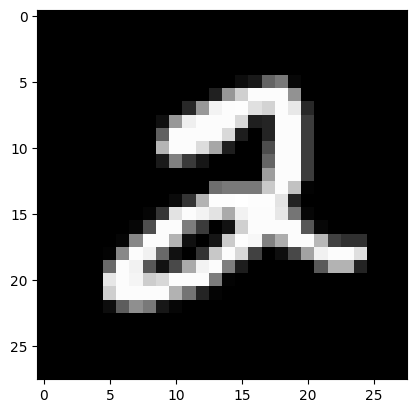

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:

X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

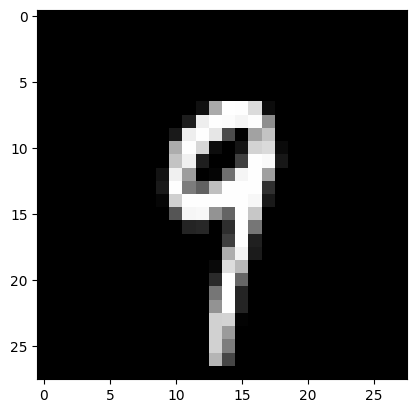

In [20]:
single_image = X_train[600]
plt.imshow(single_image,cmap='gray')

In [21]:
y_train_onehot[600]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [24]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [26]:
model.summary()
print('''Jeevitha
212222230054''')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

Jeevitha 
212222230054


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [29]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8440 - loss: 0.5335 - val_accuracy: 0.9666 - val_loss: 0.1073
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 27ms/step - accuracy: 0.9727 - loss: 0.0912 - val_accuracy: 0.9792 - val_loss: 0.0650
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9815 - loss: 0.0621 - val_accuracy: 0.9815 - val_loss: 0.0568
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9861 - loss: 0.0464 - val_accuracy: 0.9823 - val_loss: 0.0498
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 0.9793 - val_loss: 0.0601


In [30]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics.head()


,accuracy,loss,val_accuracy,val_loss
0,0.924150,0.263327,0.9666,0.107347
1,0.974717,0.084736,0.9792,0.064978
2,0.982200,0.058737,0.9815,0.056808
3,0.986350,0.045235,0.9823,0.049835
4,0.988883,0.036610,0.9793,0.060093


Jeevitha 
212222230054


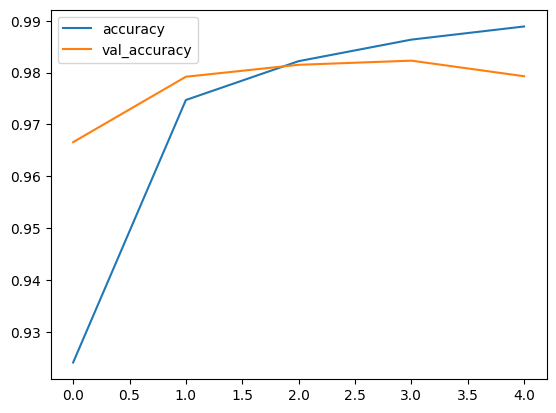

In [37]:
metrics[['accuracy','val_accuracy']].plot()
print('''Jeevitha
212222230054''')

Jeevitha 
212222230054


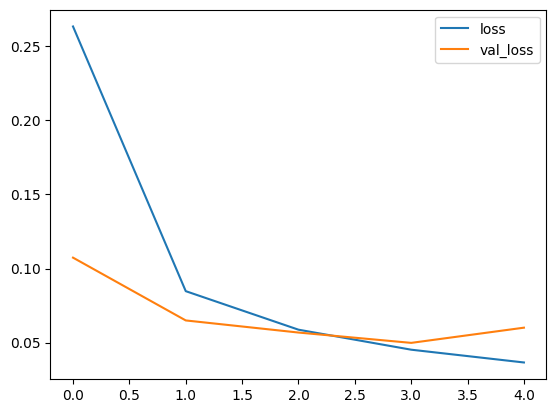

In [39]:
metrics[['loss','val_loss']].plot()
print('''Jeevitha
212222230054''')

In [40]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [42]:
print(confusion_matrix(y_test,x_test_predictions))
print('''Jeevitha
212222230054''')

[[ 974    1    0    0    0    2    2    0    1    0]
 [   0 1129    2    0    0    1    1    0    2    0]
 [   4    6  987   10    4    1    4    9    7    0]
 [   0    0    0  985    0   21    0    2    2    0]
 [   1    0    0    0  965    0    3    0    2   11]
 [   0    0    0    3    0  888    1    0    0    0]
 [   4    3    0    1    1   14  935    0    0    0]
 [   2    3    1    4    1    1    0 1010    3    3]
 [   5    0    1    2    2    9    0    2  946    7]
 [   1    2    0    1    8   19    0    3    1  974]]
Jeevitha 
212222230054


In [43]:
print(classification_report(y_test,x_test_predictions))
print('''Jeevitha
212222230054''')

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.96      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.93      1.00      0.96       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Jeevitha 
212222230054


In [45]:
img = image.load_img('/content/image.png')

In [46]:
img = image.load_img('/content/image.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [47]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [48]:
print(x_single_prediction)

[9]


 Jeevitha 
212222230054


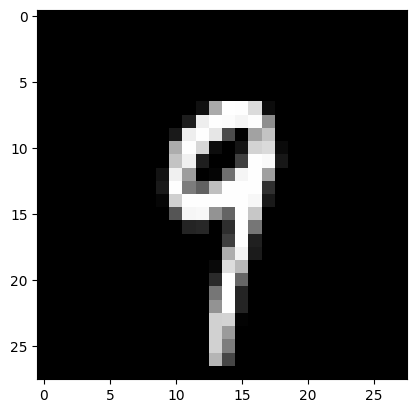

In [52]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print(''' Jeevitha
212222230054''')

In [50]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [51]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

print(x_single_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[9]
